In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
with open("data2.npy", 'rb') as f:
  data = np.load(f)

In [5]:
data.shape

(4638, 773)

In [6]:
train_val_split = 0.9
x_train = data[:int(data.shape[0]*train_val_split), :-1]
y_train = np.squeeze(data[:int(data.shape[0]*train_val_split), -1:])
x_test = data[int(data.shape[0]*train_val_split):, :-1]
y_test = np.squeeze(data[int(data.shape[0]*train_val_split):, -1:])

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(4174, 772) (4174,) (464, 772) (464,)


In [7]:
freq_dict = {}
for i in range(25):
  freq_dict[i] = np.count_nonzero(y_train == i)
freq_dict

{0: 1179,
 1: 584,
 2: 1239,
 3: 152,
 4: 217,
 5: 139,
 6: 74,
 7: 103,
 8: 76,
 9: 143,
 10: 89,
 11: 58,
 12: 29,
 13: 16,
 14: 20,
 15: 11,
 16: 13,
 17: 1,
 18: 2,
 19: 5,
 20: 5,
 21: 11,
 22: 4,
 23: 2,
 24: 2}

In [8]:
M = max(freq_dict.values())
print(M)

1239


replicate minority data

In [9]:
x_train_new = []
y_train_new = []
k = 9
for i in range(y_train.shape[0]):
  if freq_dict[y_train[i]]<M/k:
    for _ in range(int(M/(k*freq_dict[y_train[i]]))):
      x_train_new.append(x_train[i])
      y_train_new.append(y_train[i])
  else:
    x_train_new.append(x_train[i])
    y_train_new.append(y_train[i])

x_train_new = np.vstack(x_train_new)
y_train_new = np.vstack(y_train_new)
print(x_train_new.shape, y_train_new.shape)

(5820, 772) (5820, 1)


In [10]:
freq_dict_new = {}
for i in range(25):
  freq_dict_new[i] = np.count_nonzero(y_train_new == i)
freq_dict_new

{0: 1179,
 1: 584,
 2: 1239,
 3: 152,
 4: 217,
 5: 139,
 6: 74,
 7: 103,
 8: 76,
 9: 143,
 10: 89,
 11: 116,
 12: 116,
 13: 128,
 14: 120,
 15: 132,
 16: 130,
 17: 137,
 18: 136,
 19: 135,
 20: 135,
 21: 132,
 22: 136,
 23: 136,
 24: 136}

In [ ]:
ytModel = tf.keras.Sequential([
                        tf.keras.layers.InputLayer(input_shape=(772,)),
                        tf.keras.layers.Dropout(rate=0.5),
                        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        # tf.keras.layers.Dropout(rate=0.5),
                        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        # tf.keras.layers.Dropout(rate=0.5),
                        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dropout(rate=0.5),
                        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        # tf.keras.layers.Dropout(rate=0.5),
                        tf.keras.layers.Dense(25, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        # tf.keras.layers.Dropout(rate=0.5), 
                        tf.keras.layers.Dense(25, activation='sigmoid')                
])

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [ ]:
ytModel.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
epochs = 300
batch_size = 512
history = ytModel.fit(x=x_train_new, y=y_train_new, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/300
32/32 [==============================] - 1s 11ms/step - loss: 4.0262 - accuracy: 0.0717 - val_loss: 3.4390 - val_accuracy: 0.4224
Epoch 2/300
32/32 [==============================] - 0s 5ms/step - loss: 3.6441 - accuracy: 0.1449 - val_loss: 3.0903 - val_accuracy: 0.3664
Epoch 3/300
32/32 [==============================] - 0s 5ms/step - loss: 3.0256 - accuracy: 0.3026 - val_loss: 2.7360 - val_accuracy: 0.4030
Epoch 4/300
32/32 [==============================] - 0s 5ms/step - loss: 2.5303 - accuracy: 0.4371 - val_loss: 2.5959 - val_accuracy: 0.4526
Epoch 5/300
32/32 [==============================] - 0s 5ms/step - loss: 2.3128 - accuracy: 0.4978 - val_loss: 2.6032 - val_accuracy: 0.4332
Epoch 6/300
32/32 [==============================] - 0s 5ms/step - loss: 2.1413 - accuracy: 0.5405 - val_loss: 2.3847 - val_accuracy: 0.5108
Epoch 7/300
32/32 [==============================] - 0s 5ms/step - loss: 2.0004 - accuracy: 0.5769 - val_loss: 2.3421 - val_accuracy: 0.5172
Epoch 8/300


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


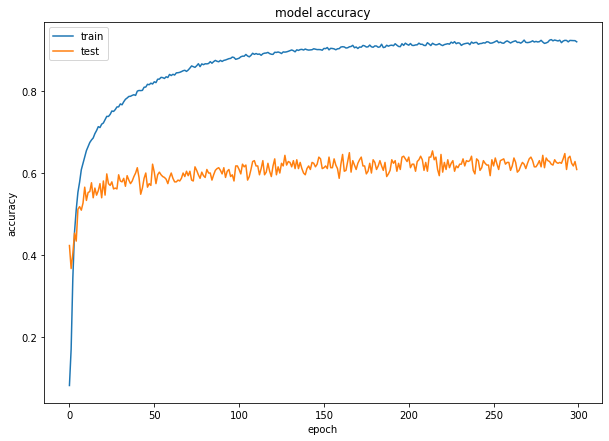

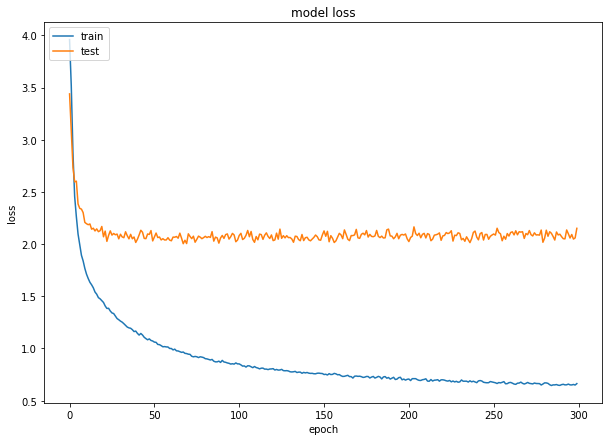

In [ ]:
print(history.history.keys())
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

overfitting

In [ ]:
ytModel = tf.keras.Sequential([
                        tf.keras.layers.InputLayer(input_shape=(772,)),
                        tf.keras.layers.Dropout(rate=0.5),
                        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        # tf.keras.layers.Dropout(rate=0.5),
                        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        # tf.keras.layers.Dropout(rate=0.5),
                        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dropout(rate=0.5),
                        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        # tf.keras.layers.Dropout(rate=0.5),
                        tf.keras.layers.Dense(25, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        # tf.keras.layers.Dropout(rate=0.5), 
                        tf.keras.layers.Dense(25, activation='sigmoid')                
])

loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(lr=1e-4)
ytModel.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
epochs = 500
batch_size = 512
history = ytModel.fit(x=x_train_new, y=y_train_new, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/500
32/32 [==============================] - 1s 11ms/step - loss: 4.1032 - accuracy: 0.0403 - val_loss: 4.0601 - val_accuracy: 0.1099
Epoch 2/500
32/32 [==============================] - 0s 5ms/step - loss: 4.0686 - accuracy: 0.0539 - val_loss: 4.0258 - val_accuracy: 0.2608
Epoch 3/500
32/32 [==============================] - 0s 5ms/step - loss: 4.0415 - accuracy: 0.0604 - val_loss: 3.9847 - val_accuracy: 0.2651
Epoch 4/500
32/32 [==============================] - 0s 5ms/step - loss: 4.0102 - accuracy: 0.0686 - val_loss: 3.9237 - val_accuracy: 0.2651
Epoch 5/500
32/32 [==============================] - 0s 5ms/step - loss: 3.9804 - accuracy: 0.0738 - val_loss: 3.8319 - val_accuracy: 0.2651
Epoch 6/500
32/32 [==============================] - 0s 5ms/step - loss: 3.9406 - accuracy: 0.0750 - val_loss: 3.7002 - val_accuracy: 0.3147
Epoch 7/500
32/32 [==============================] - 0s 5ms/step - loss: 3.8837 - accuracy: 0.0867 - val_loss: 3.5962 - val_accuracy: 0.4440
Epoch 8/500


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


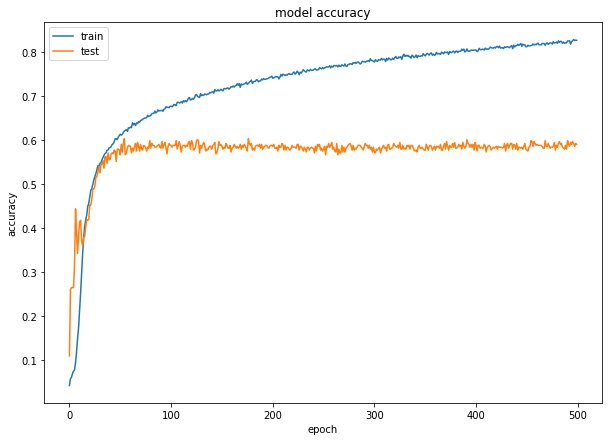

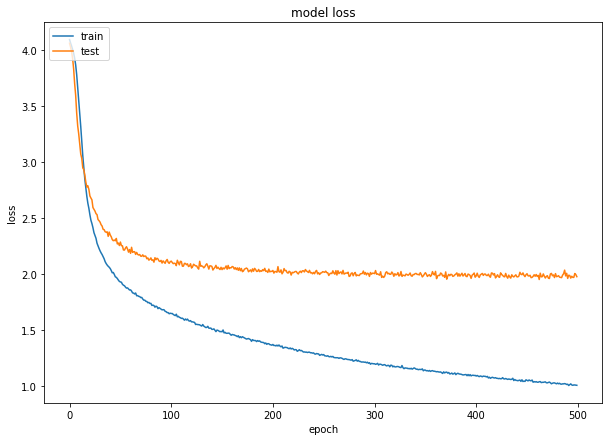

In [ ]:
print(history.history.keys())
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
ytModel = tf.keras.Sequential([
                        tf.keras.layers.InputLayer(input_shape=(772,)),
                        tf.keras.layers.Dropout(rate=0.5),
                        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        # tf.keras.layers.Dropout(rate=0.5),
                        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        # tf.keras.layers.Dropout(rate=0.5),
                        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dropout(rate=0.5),
                        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        # tf.keras.layers.Dropout(rate=0.5),
                        tf.keras.layers.Dense(25, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        # tf.keras.layers.Dropout(rate=0.5), 
                        tf.keras.layers.Dense(25, activation='sigmoid')                
])

loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(lr=1e-2)
ytModel.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
epochs = 300
batch_size = 512
history = ytModel.fit(x=x_train_new, y=y_train_new, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/300
32/32 [==============================] - 1s 11ms/step - loss: 3.7687 - accuracy: 0.0866 - val_loss: 2.9405 - val_accuracy: 0.2608
Epoch 2/300
32/32 [==============================] - 0s 5ms/step - loss: 2.7838 - accuracy: 0.2730 - val_loss: 2.7030 - val_accuracy: 0.3384
Epoch 3/300
32/32 [==============================] - 0s 5ms/step - loss: 2.3033 - accuracy: 0.3881 - val_loss: 2.3697 - val_accuracy: 0.4203
Epoch 4/300
32/32 [==============================] - 0s 5ms/step - loss: 2.0418 - accuracy: 0.4696 - val_loss: 2.3416 - val_accuracy: 0.4698
Epoch 5/300
32/32 [==============================] - 0s 4ms/step - loss: 1.8476 - accuracy: 0.5321 - val_loss: 2.2724 - val_accuracy: 0.5065
Epoch 6/300
32/32 [==============================] - 0s 5ms/step - loss: 1.7126 - accuracy: 0.5758 - val_loss: 2.2176 - val_accuracy: 0.5366
Epoch 7/300
32/32 [==============================] - 0s 5ms/step - loss: 1.6675 - accuracy: 0.6022 - val_loss: 2.2196 - val_accuracy: 0.5172
Epoch 8/300


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


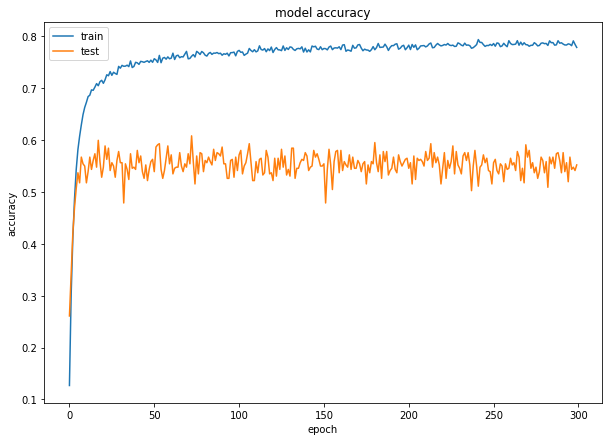

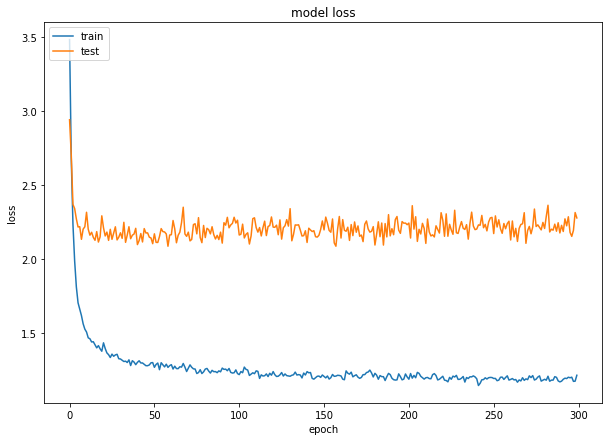

In [ ]:
print(history.history.keys())
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/300
32/32 [==============================] - 1s 17ms/step - loss: 3.7551 - accuracy: 0.0692 - val_loss: 3.3341 - val_accuracy: 0.2888
Epoch 2/300
32/32 [==============================] - 0s 4ms/step - loss: 3.2316 - accuracy: 0.2079 - val_loss: 2.7935 - val_accuracy: 0.3664
Epoch 3/300
32/32 [==============================] - 0s 4ms/step - loss: 2.5879 - accuracy: 0.3689 - val_loss: 2.5913 - val_accuracy: 0.4073
Epoch 4/300
32/32 [==============================] - 0s 5ms/step - loss: 2.2545 - accuracy: 0.4569 - val_loss: 2.4803 - val_accuracy: 0.4116
Epoch 5/300
32/32 [==============================] - 0s 5ms/step - loss: 2.0827 - accuracy: 0.4956 - val_loss: 2.4348 - val_accuracy: 0.4267
Epoch 6/300
32/32 [==============================] - 0s 5ms/step - loss: 1.9847 - accuracy: 0.5259 - val_loss: 2.3344 - val_accuracy: 0.4634
Epoch 7/300
32/32 [==============================] - 0s 5ms/step - loss: 1.8909 - accuracy: 0.5513 - val_loss: 2.3312 - val_accuracy: 0.4526
Epoch 8/300


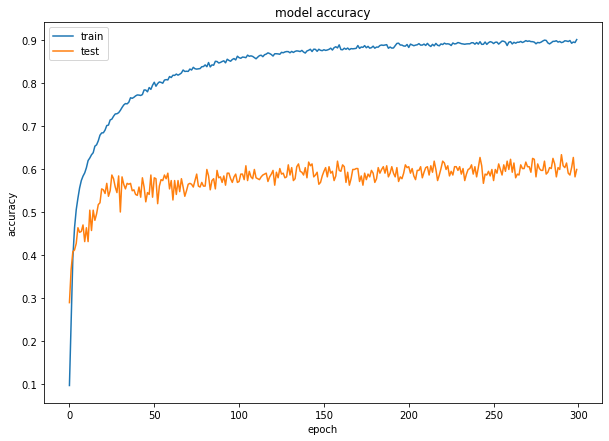

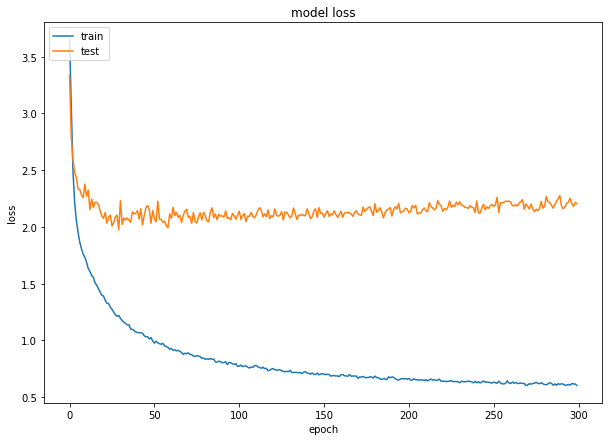

In [ ]:
ytModel = tf.keras.Sequential([
                        tf.keras.layers.InputLayer(input_shape=(772,)),
                        tf.keras.layers.Dropout(rate=0.5),
                        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dense(25, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dense(25, activation='sigmoid')                
])

loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
ytModel.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
epochs = 300
batch_size = 512
history = ytModel.fit(x=x_train_new, y=y_train_new, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

print(history.history.keys())
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/300
32/32 [==============================] - 1s 10ms/step - loss: 3.4655 - accuracy: 0.0691 - val_loss: 2.9904 - val_accuracy: 0.3362
Epoch 2/300
32/32 [==============================] - 0s 5ms/step - loss: 3.0626 - accuracy: 0.1828 - val_loss: 2.7086 - val_accuracy: 0.3750
Epoch 3/300
32/32 [==============================] - 0s 5ms/step - loss: 2.4895 - accuracy: 0.3643 - val_loss: 2.4805 - val_accuracy: 0.3966
Epoch 4/300
32/32 [==============================] - 0s 4ms/step - loss: 2.1898 - accuracy: 0.4358 - val_loss: 2.3433 - val_accuracy: 0.4483
Epoch 5/300
32/32 [==============================] - 0s 5ms/step - loss: 1.9725 - accuracy: 0.5014 - val_loss: 2.1808 - val_accuracy: 0.4892
Epoch 6/300
32/32 [==============================] - 0s 5ms/step - loss: 1.8352 - accuracy: 0.5438 - val_loss: 2.1510 - val_accuracy: 0.5043
Epoch 7/300
32/32 [==============================] - 0s 5ms/step - loss: 1.7741 - accuracy: 0.5583 - val_loss: 2.1632 - val_accuracy: 0.4892
Epoch 8/300


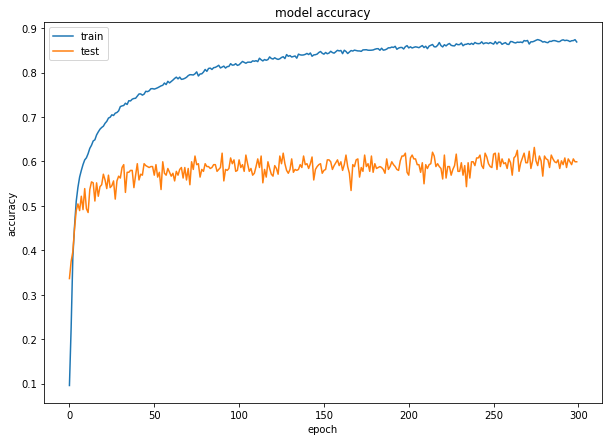

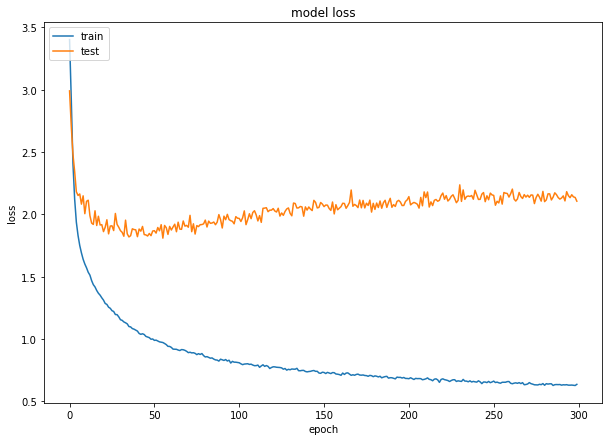

In [ ]:
ytModel = tf.keras.Sequential([
                        tf.keras.layers.InputLayer(input_shape=(772,)),
                        tf.keras.layers.Dropout(rate=0.5),
                        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dense(25, activation='sigmoid')                
])

loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
ytModel.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
epochs = 300
batch_size = 512
history = ytModel.fit(x=x_train_new, y=y_train_new, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

print(history.history.keys())
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/300
16/16 [==============================] - 1s 16ms/step - loss: 3.2651 - accuracy: 0.0445 - val_loss: 3.2459 - val_accuracy: 0.1659
Epoch 2/300
16/16 [==============================] - 0s 6ms/step - loss: 3.2426 - accuracy: 0.0610 - val_loss: 3.1618 - val_accuracy: 0.2220
Epoch 3/300
16/16 [==============================] - 0s 6ms/step - loss: 3.1944 - accuracy: 0.0814 - val_loss: 3.0052 - val_accuracy: 0.2608
Epoch 4/300
16/16 [==============================] - 0s 7ms/step - loss: 3.1073 - accuracy: 0.0979 - val_loss: 2.8169 - val_accuracy: 0.2802
Epoch 5/300
16/16 [==============================] - 0s 6ms/step - loss: 2.9901 - accuracy: 0.1245 - val_loss: 2.6288 - val_accuracy: 0.4116
Epoch 6/300
16/16 [==============================] - 0s 6ms/step - loss: 2.8738 - accuracy: 0.1919 - val_loss: 2.5141 - val_accuracy: 0.4504
Epoch 7/300
16/16 [==============================] - 0s 6ms/step - loss: 2.7065 - accuracy: 0.2339 - val_loss: 2.4048 - val_accuracy: 0.4397
Epoch 8/300


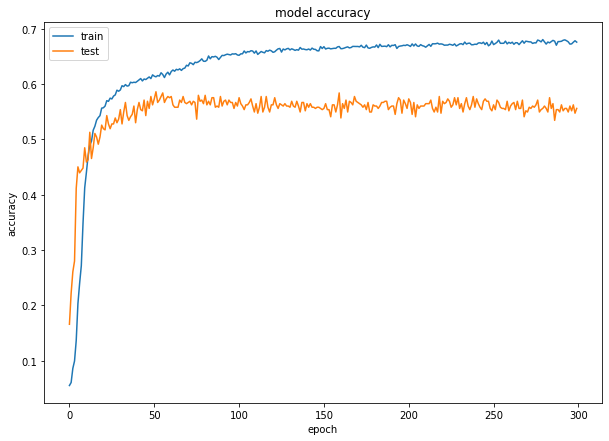

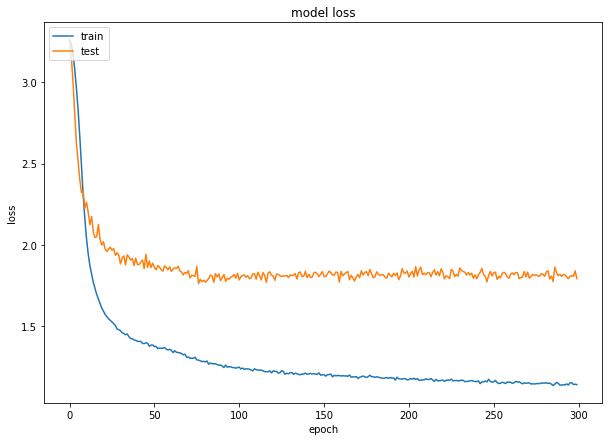

In [ ]:
ytModel = tf.keras.Sequential([
                        tf.keras.layers.InputLayer(input_shape=(772,)),
                        tf.keras.layers.Dropout(rate=0.5),
                        tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dense(25, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dense(25, activation='sigmoid')               
])

loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
ytModel.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
epochs = 300
batch_size = 1024
history = ytModel.fit(x=x_train_new, y=y_train_new, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

print(history.history.keys())
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/300
16/16 [==============================] - 1s 15ms/step - loss: 3.2646 - accuracy: 0.0581 - val_loss: 3.2679 - val_accuracy: 0.0797
Epoch 2/300
16/16 [==============================] - 0s 6ms/step - loss: 3.2157 - accuracy: 0.0517 - val_loss: 3.2166 - val_accuracy: 0.2629
Epoch 3/300
16/16 [==============================] - 0s 6ms/step - loss: 3.1549 - accuracy: 0.0899 - val_loss: 3.1335 - val_accuracy: 0.2629
Epoch 4/300
16/16 [==============================] - 0s 7ms/step - loss: 3.0627 - accuracy: 0.1244 - val_loss: 3.0633 - val_accuracy: 0.2457
Epoch 5/300
16/16 [==============================] - 0s 7ms/step - loss: 2.9586 - accuracy: 0.1931 - val_loss: 3.0134 - val_accuracy: 0.2263
Epoch 6/300
16/16 [==============================] - 0s 6ms/step - loss: 2.8395 - accuracy: 0.2021 - val_loss: 2.9559 - val_accuracy: 0.2091
Epoch 7/300
16/16 [==============================] - 0s 7ms/step - loss: 2.6933 - accuracy: 0.2482 - val_loss: 2.8666 - val_accuracy: 0.2047
Epoch 8/300


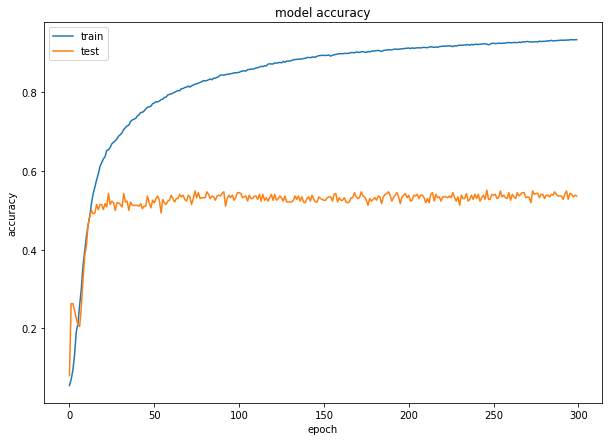

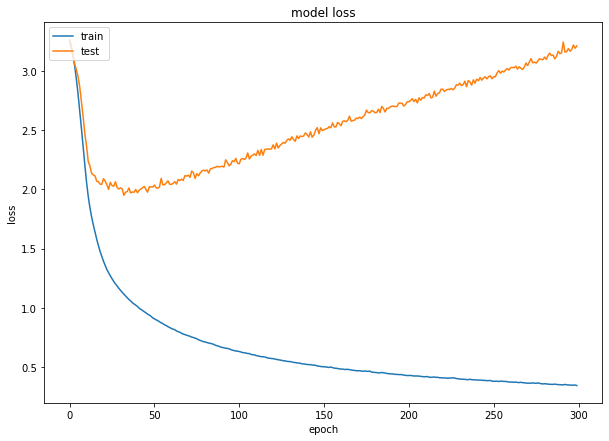

In [ ]:
ytModel = tf.keras.Sequential([
                        tf.keras.layers.InputLayer(input_shape=(772,)),
                        # tf.keras.layers.Dropout(rate=0.5),
                        tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dense(25, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dense(25, activation='sigmoid')               
])

loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
ytModel.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
epochs = 300
batch_size = 1024
history = ytModel.fit(x=x_train_new, y=y_train_new, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

print(history.history.keys())
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/300
16/16 [==============================] - 1s 16ms/step - loss: 3.3652 - accuracy: 0.0433 - val_loss: 3.2401 - val_accuracy: 0.3190
Epoch 2/300
16/16 [==============================] - 0s 6ms/step - loss: 3.3102 - accuracy: 0.0658 - val_loss: 3.1764 - val_accuracy: 0.3233
Epoch 3/300
16/16 [==============================] - 0s 6ms/step - loss: 3.2659 - accuracy: 0.0898 - val_loss: 2.9594 - val_accuracy: 0.3276
Epoch 4/300
16/16 [==============================] - 0s 6ms/step - loss: 3.1727 - accuracy: 0.1232 - val_loss: 2.7668 - val_accuracy: 0.3750
Epoch 5/300
16/16 [==============================] - 0s 6ms/step - loss: 2.9909 - accuracy: 0.1850 - val_loss: 2.6250 - val_accuracy: 0.4030
Epoch 6/300
16/16 [==============================] - 0s 6ms/step - loss: 2.7870 - accuracy: 0.2415 - val_loss: 2.5186 - val_accuracy: 0.4116
Epoch 7/300
16/16 [==============================] - 0s 6ms/step - loss: 2.5972 - accuracy: 0.2697 - val_loss: 2.3964 - val_accuracy: 0.4440
Epoch 8/300


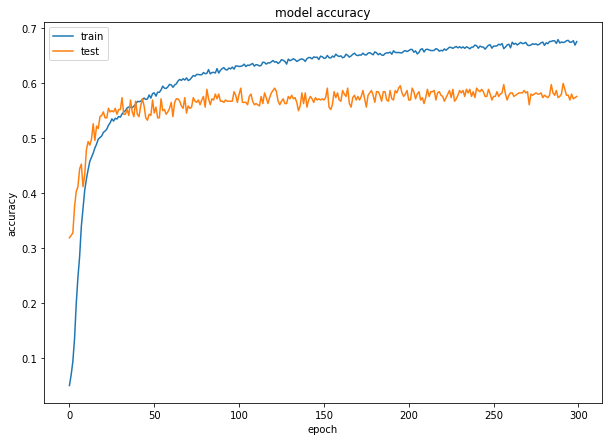

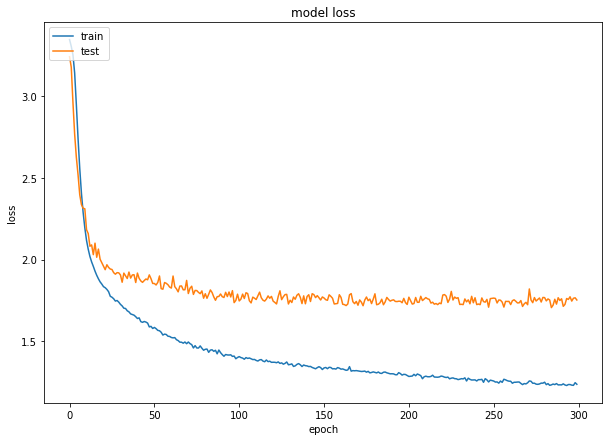

In [ ]:
ytModel = tf.keras.Sequential([
                        tf.keras.layers.InputLayer(input_shape=(772,)),
                        tf.keras.layers.Dropout(rate=0.8),
                        tf.keras.layers.Dense(25, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dense(25, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dense(25, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dense(25, activation='sigmoid')               
])

loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
ytModel.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
epochs = 300
batch_size = 1024
history = ytModel.fit(x=x_train_new, y=y_train_new, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

print(history.history.keys())
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/300
16/16 [==============================] - 1s 17ms/step - loss: 3.3932 - accuracy: 0.0389 - val_loss: 3.2996 - val_accuracy: 0.0259
Epoch 2/300
16/16 [==============================] - 0s 6ms/step - loss: 3.3234 - accuracy: 0.0548 - val_loss: 3.2842 - val_accuracy: 0.2522
Epoch 3/300
16/16 [==============================] - 0s 6ms/step - loss: 3.3066 - accuracy: 0.0650 - val_loss: 3.2518 - val_accuracy: 0.2737
Epoch 4/300
16/16 [==============================] - 0s 6ms/step - loss: 3.2874 - accuracy: 0.0736 - val_loss: 3.1346 - val_accuracy: 0.3233
Epoch 5/300
16/16 [==============================] - 0s 6ms/step - loss: 3.2562 - accuracy: 0.0851 - val_loss: 2.9902 - val_accuracy: 0.4116
Epoch 6/300
16/16 [==============================] - 0s 6ms/step - loss: 3.2016 - accuracy: 0.1000 - val_loss: 2.8489 - val_accuracy: 0.4138
Epoch 7/300
16/16 [==============================] - 0s 6ms/step - loss: 3.0944 - accuracy: 0.1491 - val_loss: 2.7037 - val_accuracy: 0.2931
Epoch 8/300


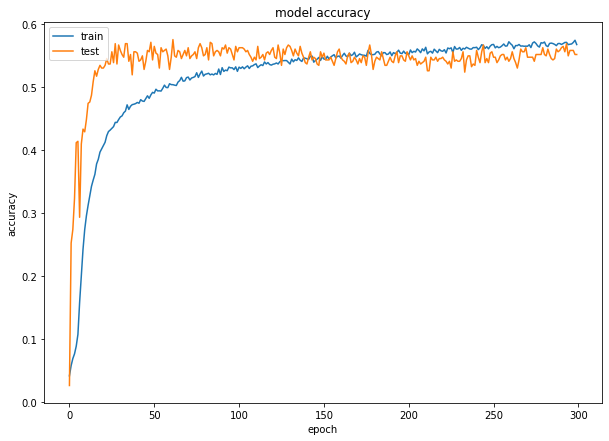

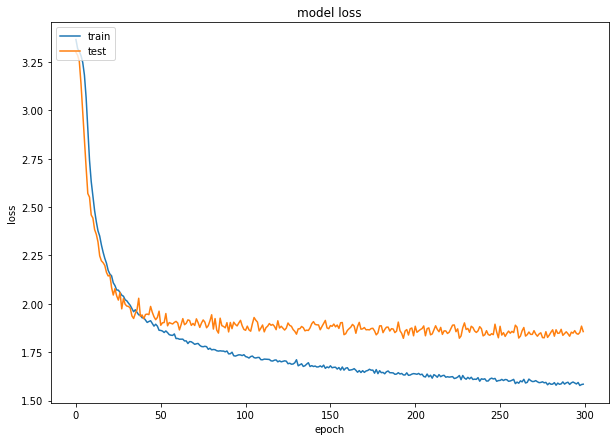

In [ ]:
ytModel = tf.keras.Sequential([
                        tf.keras.layers.InputLayer(input_shape=(772,)),
                        tf.keras.layers.Dropout(rate=0.9),
                        tf.keras.layers.Dense(25, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dense(25, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dense(25, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dense(25, activation='sigmoid')               
])

loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
ytModel.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
epochs = 300
batch_size = 1024
history = ytModel.fit(x=x_train_new, y=y_train_new, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

print(history.history.keys())
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/300
16/16 [==============================] - 1s 18ms/step - loss: 3.3500 - accuracy: 0.0501 - val_loss: 3.2791 - val_accuracy: 0.2823
Epoch 2/300
16/16 [==============================] - 0s 6ms/step - loss: 3.3025 - accuracy: 0.0700 - val_loss: 3.1793 - val_accuracy: 0.3384
Epoch 3/300
16/16 [==============================] - 0s 7ms/step - loss: 3.2493 - accuracy: 0.0865 - val_loss: 2.9794 - val_accuracy: 0.3901
Epoch 4/300
16/16 [==============================] - 0s 7ms/step - loss: 3.1356 - accuracy: 0.1171 - val_loss: 2.8057 - val_accuracy: 0.4116
Epoch 5/300
16/16 [==============================] - 0s 7ms/step - loss: 3.0013 - accuracy: 0.1678 - val_loss: 2.7226 - val_accuracy: 0.4009
Epoch 6/300
16/16 [==============================] - 0s 7ms/step - loss: 2.8665 - accuracy: 0.1972 - val_loss: 2.6008 - val_accuracy: 0.4310
Epoch 7/300
16/16 [==============================] - 0s 7ms/step - loss: 2.7378 - accuracy: 0.2365 - val_loss: 2.5440 - val_accuracy: 0.4073
Epoch 8/300


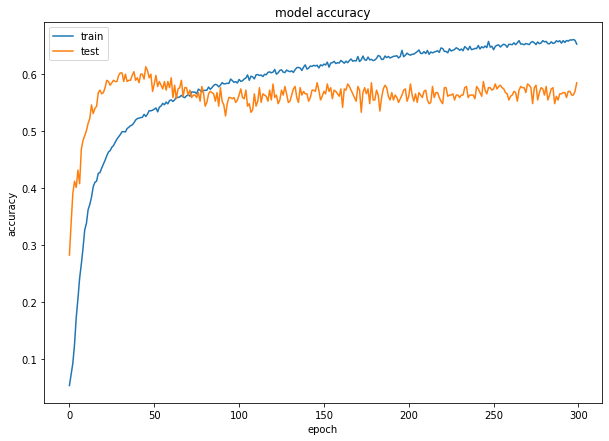

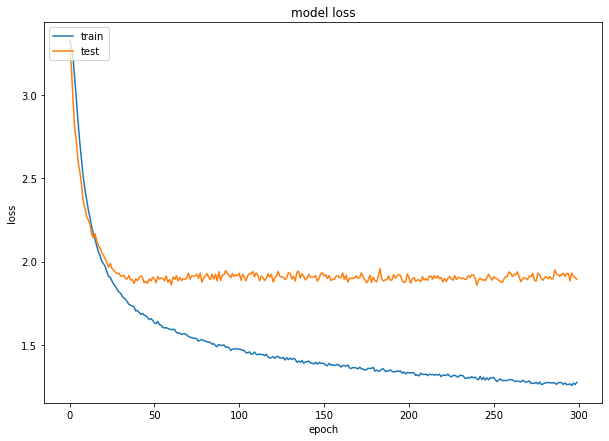

In [ ]:
ytModel = tf.keras.Sequential([
                        tf.keras.layers.InputLayer(input_shape=(772,)),
                        tf.keras.layers.Dropout(rate=0.5),
                        tf.keras.layers.Dense(25, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dense(25, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dense(25, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dropout(rate=0.5),
                        tf.keras.layers.Dense(25, activation='sigmoid')               
])

loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
ytModel.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
epochs = 300
batch_size = 1024
history = ytModel.fit(x=x_train_new, y=y_train_new, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

print(history.history.keys())
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/1000
16/16 [==============================] - 1s 30ms/step - loss: 3.3053 - accuracy: 0.0659 - val_loss: 2.9313 - val_accuracy: 0.4138
Epoch 2/1000
16/16 [==============================] - 0s 6ms/step - loss: 3.1402 - accuracy: 0.1321 - val_loss: 2.8109 - val_accuracy: 0.4483
Epoch 3/1000
16/16 [==============================] - 0s 6ms/step - loss: 2.9745 - accuracy: 0.1856 - val_loss: 2.6065 - val_accuracy: 0.4871
Epoch 4/1000
16/16 [==============================] - 0s 6ms/step - loss: 2.8003 - accuracy: 0.2409 - val_loss: 2.4675 - val_accuracy: 0.5108
Epoch 5/1000
16/16 [==============================] - 0s 6ms/step - loss: 2.6386 - accuracy: 0.3081 - val_loss: 2.4325 - val_accuracy: 0.5151
Epoch 6/1000
16/16 [==============================] - 0s 6ms/step - loss: 2.4816 - accuracy: 0.3550 - val_loss: 2.3411 - val_accuracy: 0.5237
Epoch 7/1000
16/16 [==============================] - 0s 6ms/step - loss: 2.3427 - accuracy: 0.3966 - val_loss: 2.2598 - val_accuracy: 0.5388
Epoch

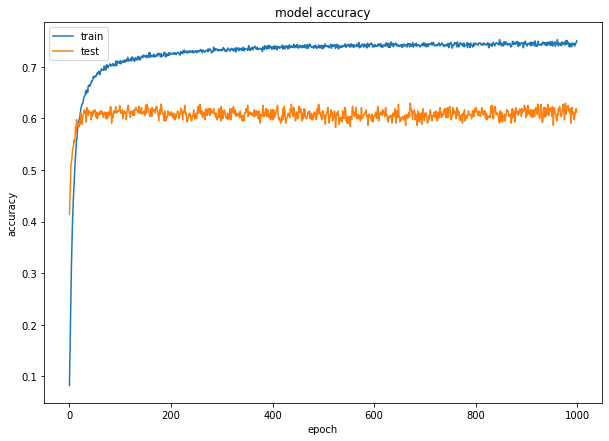

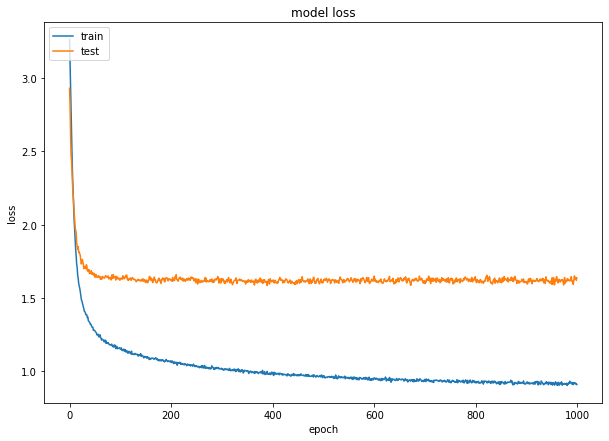

In [ ]:
ytModel = tf.keras.Sequential([
                        tf.keras.layers.InputLayer(input_shape=(772,)),
                        tf.keras.layers.Dropout(rate=0.3),
                        tf.keras.layers.Dense(25, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        # tf.keras.layers.Dense(25, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        # tf.keras.layers.Dense(25, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(1e-4, 1e-4)),
                        tf.keras.layers.Dropout(rate=0.3),
                        tf.keras.layers.Dense(25, activation='sigmoid')               
])

loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
ytModel.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
epochs = 1000
batch_size = 1024
history = ytModel.fit(x=x_train_new, y=y_train_new, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

print(history.history.keys())
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/1500
16/16 [==============================] - 1s 14ms/step - loss: 3.7340 - accuracy: 0.0403 - val_loss: 3.4733 - val_accuracy: 0.1552
Epoch 2/1500
16/16 [==============================] - 0s 6ms/step - loss: 3.5219 - accuracy: 0.0795 - val_loss: 3.2180 - val_accuracy: 0.4289
Epoch 3/1500
16/16 [==============================] - 0s 6ms/step - loss: 3.3429 - accuracy: 0.1492 - val_loss: 2.9814 - val_accuracy: 0.5022
Epoch 4/1500
16/16 [==============================] - 0s 6ms/step - loss: 3.1648 - accuracy: 0.2102 - val_loss: 2.7851 - val_accuracy: 0.5108
Epoch 5/1500
16/16 [==============================] - 0s 6ms/step - loss: 2.9749 - accuracy: 0.2655 - val_loss: 2.7152 - val_accuracy: 0.4957
Epoch 6/1500
16/16 [==============================] - 0s 6ms/step - loss: 2.8122 - accuracy: 0.3157 - val_loss: 2.5747 - val_accuracy: 0.5280
Epoch 7/1500
16/16 [==============================] - 0s 6ms/step - loss: 2.6545 - accuracy: 0.3589 - val_loss: 2.5067 - val_accuracy: 0.5345
Epoch

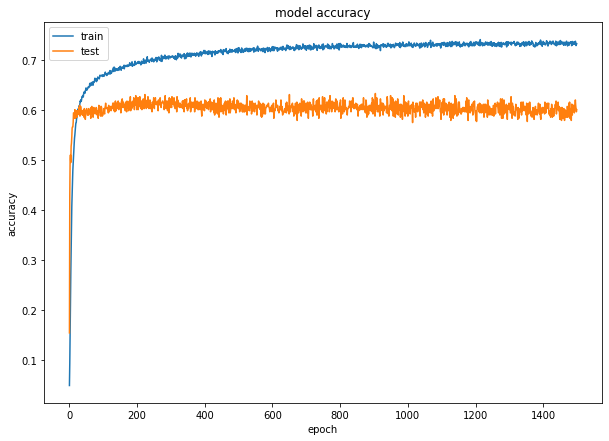

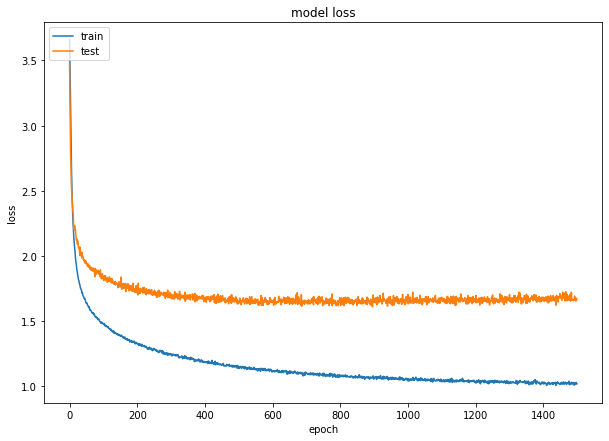

In [ ]:
ytModel = tf.keras.Sequential([
                        tf.keras.layers.InputLayer(input_shape=(772,)),
                        tf.keras.layers.Dropout(rate=0.3),
                        tf.keras.layers.Dense(25, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(5e-4, 5e-4)),
                        tf.keras.layers.Dropout(rate=0.3),
                        tf.keras.layers.Dense(25, activation='sigmoid')               
])

loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
ytModel.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
epochs = 1500
batch_size = 1024
history = ytModel.fit(x=x_train_new, y=y_train_new, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

print(history.history.keys())
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/1500
11/11 [==============================] - 0s 18ms/step - loss: 5.2902 - accuracy: 0.0899 - val_loss: 4.5008 - val_accuracy: 0.4353
Epoch 2/1500
11/11 [==============================] - 0s 7ms/step - loss: 4.6854 - accuracy: 0.2234 - val_loss: 3.8765 - val_accuracy: 0.5108
Epoch 3/1500
11/11 [==============================] - 0s 6ms/step - loss: 4.1066 - accuracy: 0.3425 - val_loss: 3.4925 - val_accuracy: 0.5668
Epoch 4/1500
11/11 [==============================] - 0s 7ms/step - loss: 3.6609 - accuracy: 0.4098 - val_loss: 3.2146 - val_accuracy: 0.5862
Epoch 5/1500
11/11 [==============================] - 0s 7ms/step - loss: 3.2825 - accuracy: 0.4721 - val_loss: 3.0081 - val_accuracy: 0.5862
Epoch 6/1500
11/11 [==============================] - 0s 7ms/step - loss: 2.9973 - accuracy: 0.5141 - val_loss: 2.8360 - val_accuracy: 0.5991
Epoch 7/1500
11/11 [==============================] - 0s 7ms/step - loss: 2.7952 - accuracy: 0.5425 - val_loss: 2.6920 - val_accuracy: 0.6056
Epoch

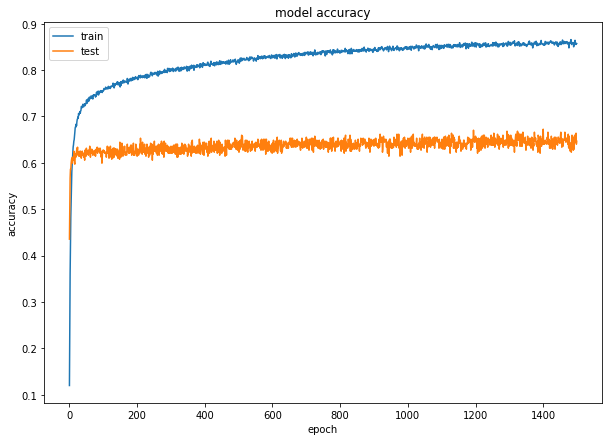

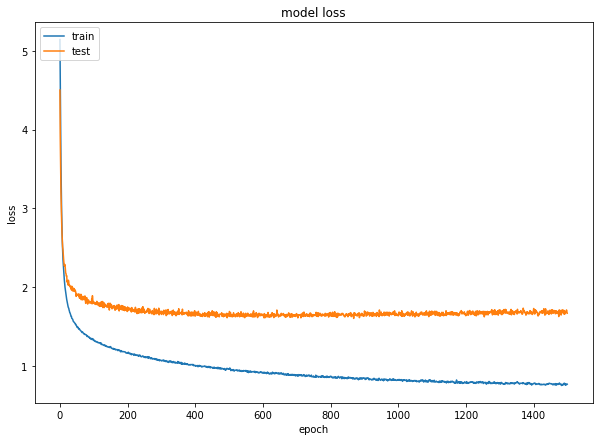

In [ ]:
###################
ytModel = tf.keras.Sequential([
                        tf.keras.layers.InputLayer(input_shape=(772,)),
                        tf.keras.layers.Dropout(rate=0.3),
                        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(5e-4, 5e-4)),
                        tf.keras.layers.Dropout(rate=0.3),
                        tf.keras.layers.Dense(25, activation='sigmoid')               
])

loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
ytModel.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
epochs = 1500
batch_size = 1024
history = ytModel.fit(x=x_train_new, y=y_train_new, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

print(history.history.keys())
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/1500
10/10 [==============================] - 1s 46ms/step - loss: 5.3588 - accuracy: 0.0764 - val_loss: 4.3814 - val_accuracy: 0.4332
Epoch 2/1500
10/10 [==============================] - 0s 8ms/step - loss: 4.7489 - accuracy: 0.2016 - val_loss: 3.9388 - val_accuracy: 0.5000
Epoch 3/1500
10/10 [==============================] - 0s 7ms/step - loss: 4.3182 - accuracy: 0.2817 - val_loss: 3.5799 - val_accuracy: 0.5431
Epoch 4/1500
10/10 [==============================] - 0s 7ms/step - loss: 3.8763 - accuracy: 0.3708 - val_loss: 3.3463 - val_accuracy: 0.5776
Epoch 5/1500
10/10 [==============================] - 0s 7ms/step - loss: 3.5387 - accuracy: 0.4258 - val_loss: 3.0483 - val_accuracy: 0.6099
Epoch 6/1500
10/10 [==============================] - 0s 8ms/step - loss: 3.2487 - accuracy: 0.4703 - val_loss: 2.8463 - val_accuracy: 0.6099
Epoch 7/1500
10/10 [==============================] - 0s 7ms/step - loss: 3.0099 - accuracy: 0.4975 - val_loss: 2.7508 - val_accuracy: 0.5991
Epoch

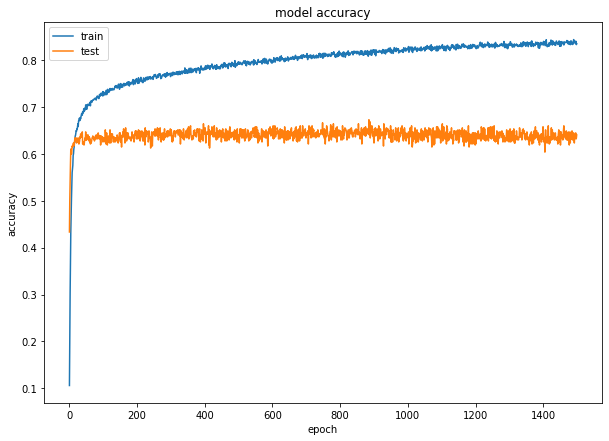

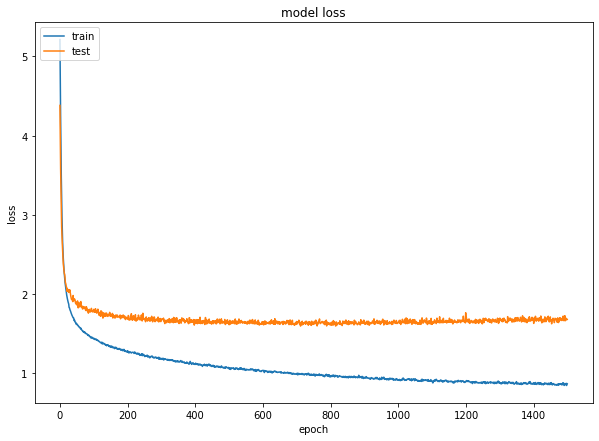

In [ ]:
ytModel = tf.keras.Sequential([
                        tf.keras.layers.InputLayer(input_shape=(772,)),
                        tf.keras.layers.Dropout(rate=0.3),
                        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(5e-4, 5e-4)),
                        tf.keras.layers.Dropout(rate=0.3),
                        tf.keras.layers.Dense(25, activation='sigmoid')               
])

loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
ytModel.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
epochs = 1500
batch_size = 1024
history = ytModel.fit(x=x_train_new, y=y_train_new, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

print(history.history.keys())
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
val_acc_least_loss = []

M = max(freq_dict.values())
for k in range(1, 11):
  x_train_new = []
  y_train_new = []

  for i in range(y_train.shape[0]):
    if freq_dict[y_train[i]]<M/k:
      for _ in range(int(M/(k*freq_dict[y_train[i]]))):
        x_train_new.append(x_train[i])
        y_train_new.append(y_train[i])
    else:
      x_train_new.append(x_train[i])
      y_train_new.append(y_train[i])

  x_train_new = np.vstack(x_train_new)
  y_train_new = np.vstack(y_train_new)
  # print(x_train_new.shape, y_train_new.shape)

  ytModel = tf.keras.Sequential([
                        tf.keras.layers.InputLayer(input_shape=(772,)),
                        tf.keras.layers.Dropout(rate=0.3),
                        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(5e-4, 5e-4)),
                        tf.keras.layers.Dropout(rate=0.3),
                        tf.keras.layers.Dense(25, activation='sigmoid')                 
  ])

  loss = tf.keras.losses.SparseCategoricalCrossentropy()
  optimizer = tf.keras.optimizers.Adam()
  ytModel.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

  epochs = 1000
  batch_size = 1024
  history = ytModel.fit(x=x_train_new, y=y_train_new, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=0)

  least_loss_idx = np.argmin(np.asarray(history.history["val_loss"]))
  val_acc_least_loss.append([k, least_loss_idx, history.history["val_accuracy"]])
  print(val_acc_least_loss[-1])

[1, 473, [0.3340517282485962, 0.45474138855934143, 0.45258620381355286, 0.46336206793785095, 0.4806034564971924, 0.506465494632721, 0.4762931168079376, 0.49353447556495667, 0.5, 0.5086206793785095, 0.5431034564971924, 0.4978448152542114, 0.5150862336158752, 0.5086206793785095, 0.5107758641242981, 0.5086206793785095, 0.5150862336158752, 0.5215517282485962, 0.5043103694915771, 0.5086206793785095, 0.5323275923728943, 0.5344827771186829, 0.5280172228813171, 0.5107758641242981, 0.5043103694915771, 0.5021551847457886, 0.5215517282485962, 0.5129310488700867, 0.49353447556495667, 0.5129310488700867, 0.5387930870056152, 0.5150862336158752, 0.5280172228813171, 0.5086206793785095, 0.517241358757019, 0.5280172228813171, 0.5258620977401733, 0.5258620977401733, 0.5150862336158752, 0.5237069129943848, 0.517241358757019, 0.5301724076271057, 0.5366379022598267, 0.5323275923728943, 0.5366379022598267, 0.5215517282485962, 0.5258620977401733, 0.5129310488700867, 0.5086206793785095, 0.5495689511299133, 0.5

In [ ]:
for li in val_acc_least_loss:
  print(li[0], li[1], li[2][li[1]])

1 473 0.6163793206214905
2 821 0.6400862336158752
3 444 0.6379310488700867
4 480 0.6573275923728943
5 623 0.6573275923728943
6 972 0.6573275923728943
7 821 0.6637930870056152
8 848 0.6637930870056152
9 971 0.6767241358757019
10 816 0.6616379022598267


In [ ]:
k = 9
x_train_new = []
y_train_new = []

for i in range(y_train.shape[0]):
  if freq_dict[y_train[i]]<M/k:
    for _ in range(int(M/(k*freq_dict[y_train[i]]))):
      x_train_new.append(x_train[i])
      y_train_new.append(y_train[i])
  else:
    x_train_new.append(x_train[i])
    y_train_new.append(y_train[i])

x_train_new = np.vstack(x_train_new)
y_train_new = np.vstack(y_train_new)
# print(x_train_new.shape, y_train_new.shape)

In [ ]:
for drop in np.arange(0,1,0.1):
  print("drop:", drop)
  val_acc_least_loss_units = []
  for unit in [16, 32, 64, 128, 256, 512]:
    ytModel = tf.keras.Sequential([
                          tf.keras.layers.InputLayer(input_shape=(772,)),
                          tf.keras.layers.Dropout(rate=drop),
                          tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(5e-4, 5e-4)),
                          tf.keras.layers.Dropout(rate=drop),
                          tf.keras.layers.Dense(25, activation='sigmoid')                 
    ])

    loss = tf.keras.losses.SparseCategoricalCrossentropy()
    optimizer = tf.keras.optimizers.Adam()
    ytModel.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    epochs = 1000
    batch_size = 1024
    history = ytModel.fit(x=x_train_new, y=y_train_new, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=0)

    least_loss_idx = np.argmin(np.asarray(history.history["val_loss"]))
    val_acc_least_loss_units.append([drop, unit, least_loss_idx, history.history["val_accuracy"][least_loss_idx]])
    print(val_acc_least_loss_units[-1])
  print("best unit in this drop:", max(val_acc_least_loss_units, key= lambda x:x[-1]))

drop: 0.0
[0.0, 16, 489, 0.6616379022598267]
[0.0, 32, 524, 0.642241358757019]
[0.0, 64, 499, 0.6573275923728943]
[0.0, 128, 410, 0.6465517282485962]
[0.0, 256, 471, 0.6508620977401733]
[0.0, 512, 356, 0.670258641242981]
best unit in this drop: [0.0, 512, 356, 0.670258641242981]
drop: 0.1
[0.1, 16, 519, 0.6616379022598267]
[0.1, 32, 455, 0.6724137663841248]
[0.1, 64, 557, 0.6573275923728943]
[0.1, 128, 862, 0.6530172228813171]
[0.1, 256, 542, 0.6573275923728943]
[0.1, 512, 666, 0.6573275923728943]
best unit in this drop: [0.1, 32, 455, 0.6724137663841248]
drop: 0.2
[0.2, 16, 599, 0.6681034564971924]
[0.2, 32, 946, 0.6681034564971924]
[0.2, 64, 870, 0.6551724076271057]
[0.2, 128, 868, 0.6616379022598267]
[0.2, 256, 745, 0.6594827771186829]
[0.2, 512, 699, 0.6659482717514038]
best unit in this drop: [0.2, 16, 599, 0.6681034564971924]
drop: 0.30000000000000004
[0.30000000000000004, 16, 695, 0.6659482717514038]
[0.30000000000000004, 32, 893, 0.6616379022598267]
[0.30000000000000004, 64, 93

In [11]:
ytModel = tf.keras.Sequential([
                        tf.keras.layers.InputLayer(input_shape=(772,)),
                        tf.keras.layers.Dropout(rate=0.4),
                        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(5e-4, 5e-4)),
                        tf.keras.layers.Dropout(rate=0.4),
                        tf.keras.layers.Dense(25, activation='softmax')               
])

loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
ytModel.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
epochs = 1500
batch_size = 1024
history = ytModel.fit(x=x_train_new, y=y_train_new, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/1500
6/6 [==============================] - 3s 79ms/step - loss: 4.3741 - accuracy: 0.0876 - val_loss: 3.3632 - val_accuracy: 0.4375
Epoch 2/1500
6/6 [==============================] - 0s 9ms/step - loss: 3.9178 - accuracy: 0.2369 - val_loss: 3.2419 - val_accuracy: 0.4720
Epoch 3/1500
6/6 [==============================] - 0s 9ms/step - loss: 3.7076 - accuracy: 0.2850 - val_loss: 3.1834 - val_accuracy: 0.5086
Epoch 4/1500
6/6 [==============================] - 0s 9ms/step - loss: 3.5947 - accuracy: 0.3076 - val_loss: 2.9729 - val_accuracy: 0.5194
Epoch 5/1500
6/6 [==============================] - 0s 9ms/step - loss: 3.4352 - accuracy: 0.3410 - val_loss: 2.8314 - val_accuracy: 0.5302
Epoch 6/1500
6/6 [==============================] - 0s 9ms/step - loss: 3.3159 - accuracy: 0.3576 - val_loss: 2.7820 - val_accuracy: 0.5690
Epoch 7/1500
6/6 [==============================] - 0s 9ms/step - loss: 3.2274 - accuracy: 0.3680 - val_loss: 2.6572 - val_accuracy: 0.5625
Epoch 8/1500
6/6 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


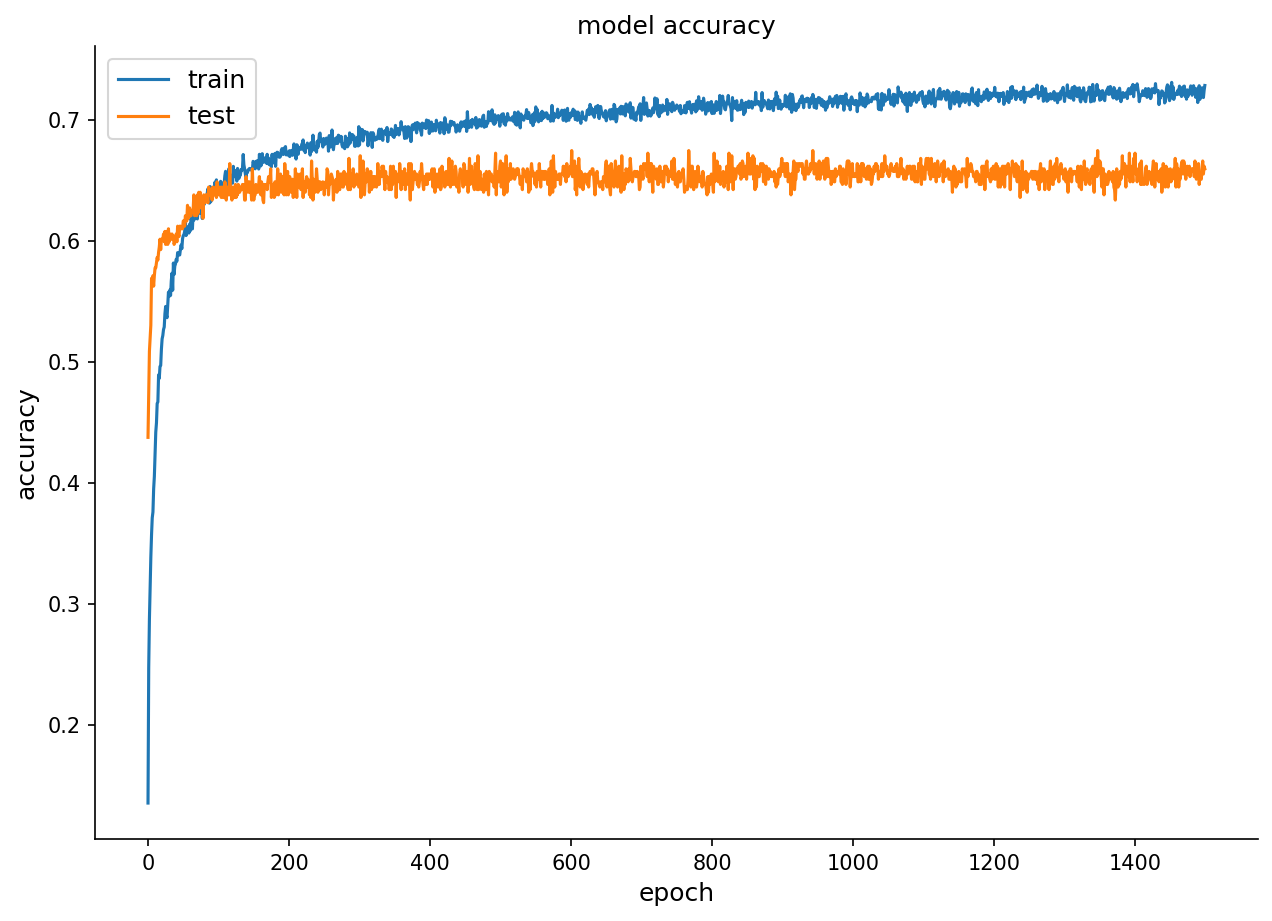

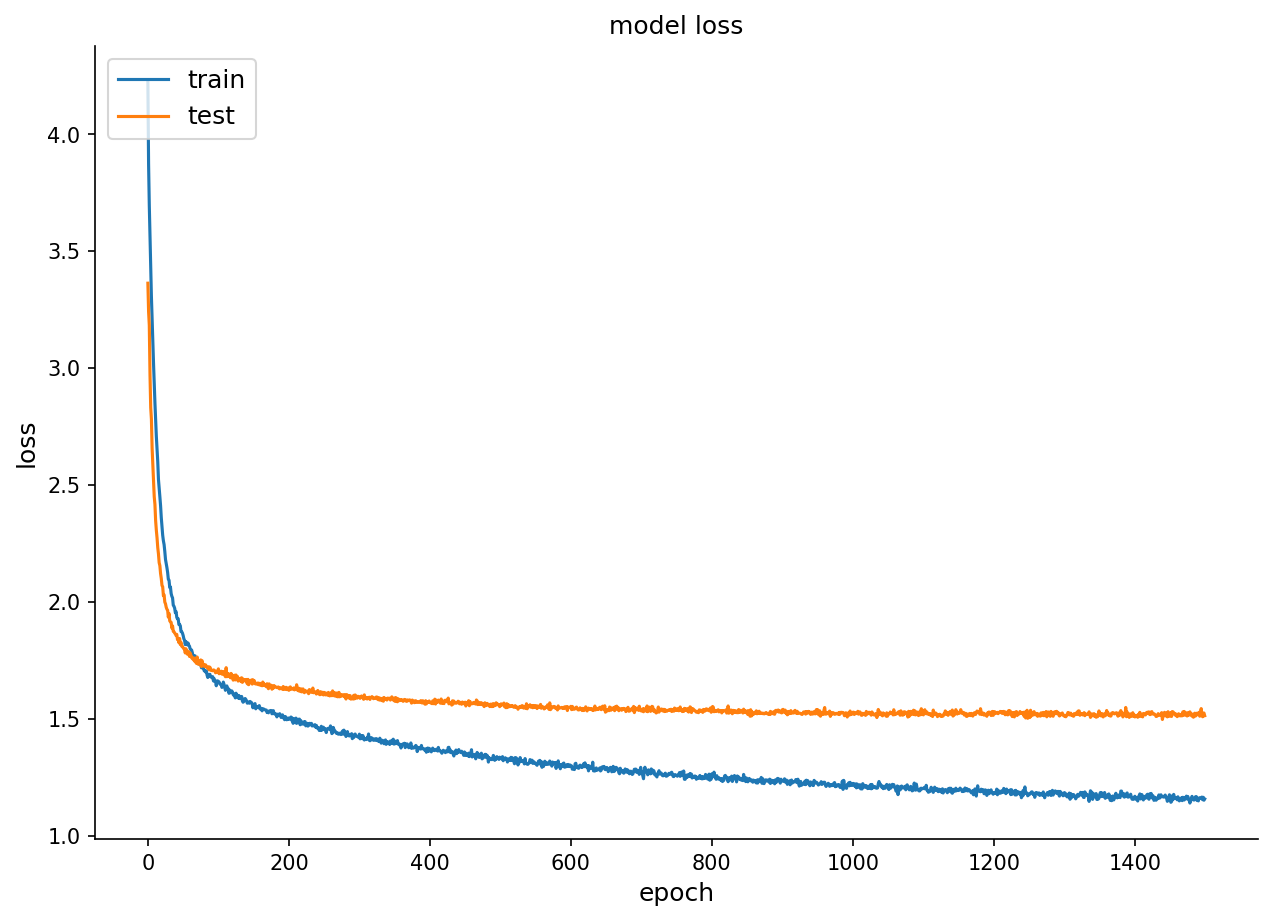

In [12]:
print(history.history.keys())
plt.figure(figsize=(10, 7), dpi=150)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy', fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left', fontsize=12)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

plt.figure(figsize=(10, 7), dpi=150)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss', fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left', fontsize=12)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [13]:
ytModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 772)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                49472     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1625      
Total params: 51,097
Trainable params: 51,097
Non-trainable params: 0
_________________________________________________________________


In [15]:
max(history.history["val_accuracy"])

0.6745689511299133